## Introduction

This notebook contains the analysis for our education data toward the goal of exploring the ability of socioeconomic factors to predict a school's average ACT/SAT score. 

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

# Import additional libraries
from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import Axes3D

import statsmodels.formula.api as smf
from mpl_toolkits import mplot3d
from matplotlib import cm

from sklearn import linear_model, tree
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

## Load clean data

Load the clean data sets from Github. 

In [3]:
# the training data 
train = pd.read_csv('https://raw.githubusercontent.com/cmdenault/Education/main/clean_data/education_clean_train.csv')

In [4]:
# the testing data
test = pd.read_csv('https://raw.githubusercontent.com/cmdenault/Education/main/clean_data/education_clean_test.csv')

In [5]:
# the training data, with the region dummy variable included (for additional question)
df_state = pd.read_csv('https://raw.githubusercontent.com/cmdenault/Education/main/clean_data/df_states_training.csv')

In [6]:
# the testing data, with the region dummy variable included (for additional question)
df_state_test = pd.read_csv('https://raw.githubusercontent.com/cmdenault/Education/main/clean_data/df_states_tester.csv')

Review the contents of the data set.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   median_income      5781 non-null   float64
 1   percent_college    5781 non-null   float64
 2   percent_lunch      5781 non-null   float64
 3   percent_married    5781 non-null   float64
 4   rate_unemployment  5781 non-null   float64
 5   school_level       5781 non-null   object 
 6   school_type        5781 non-null   object 
 7   state              5781 non-null   object 
 8   year               5781 non-null   object 
 9   zip_code           5781 non-null   int64  
 10  average_act        5781 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 496.9+ KB


In [8]:
train.describe()

,median_income,percent_college,percent_lunch,percent_married,rate_unemployment,zip_code,average_act
count,5781.000000,5781.000000,5781.000000,5781.000000,5781.000000,5781.000000,5781.000000
mean,53134.422407,0.573699,0.409149,0.642302,0.096026,45302.428646,20.314764
std,24822.908872,0.165777,0.233754,0.191123,0.056778,24230.971874,2.519850
min,1402.099191,0.120885,0.000000,0.000000,0.000000,1001.000000,12.362637
25%,37202.000000,0.453626,0.231783,0.535902,0.057427,28525.000000,18.800000
50%,47607.000000,0.559465,0.369536,0.672950,0.083510,45333.000000,20.567766
75%,62367.000000,0.682363,0.556985,0.781504,0.120820,62629.000000,22.000000
max,226181.000000,1.000000,0.998729,1.000000,0.590278,99403.000000,32.362637


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   median_income      1446 non-null   float64
 1   percent_college    1446 non-null   float64
 2   percent_lunch      1446 non-null   float64
 3   percent_married    1446 non-null   float64
 4   rate_unemployment  1446 non-null   float64
 5   school_level       1446 non-null   object 
 6   school_type        1446 non-null   object 
 7   state              1446 non-null   object 
 8   year               1446 non-null   object 
 9   zip_code           1446 non-null   int64  
 10  average_act        1446 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 124.4+ KB


## Driving Questions

The overall problem is to determine whether and how average school ACT performance is related to socioeconomic factors. To answer this general problem, we will need to ask specific questions about the data.




Are all of the coefficients statistically significant? <br>
What combination produces the strongest model? <br>


Lets make a pairplot to start exploring relationships between the 

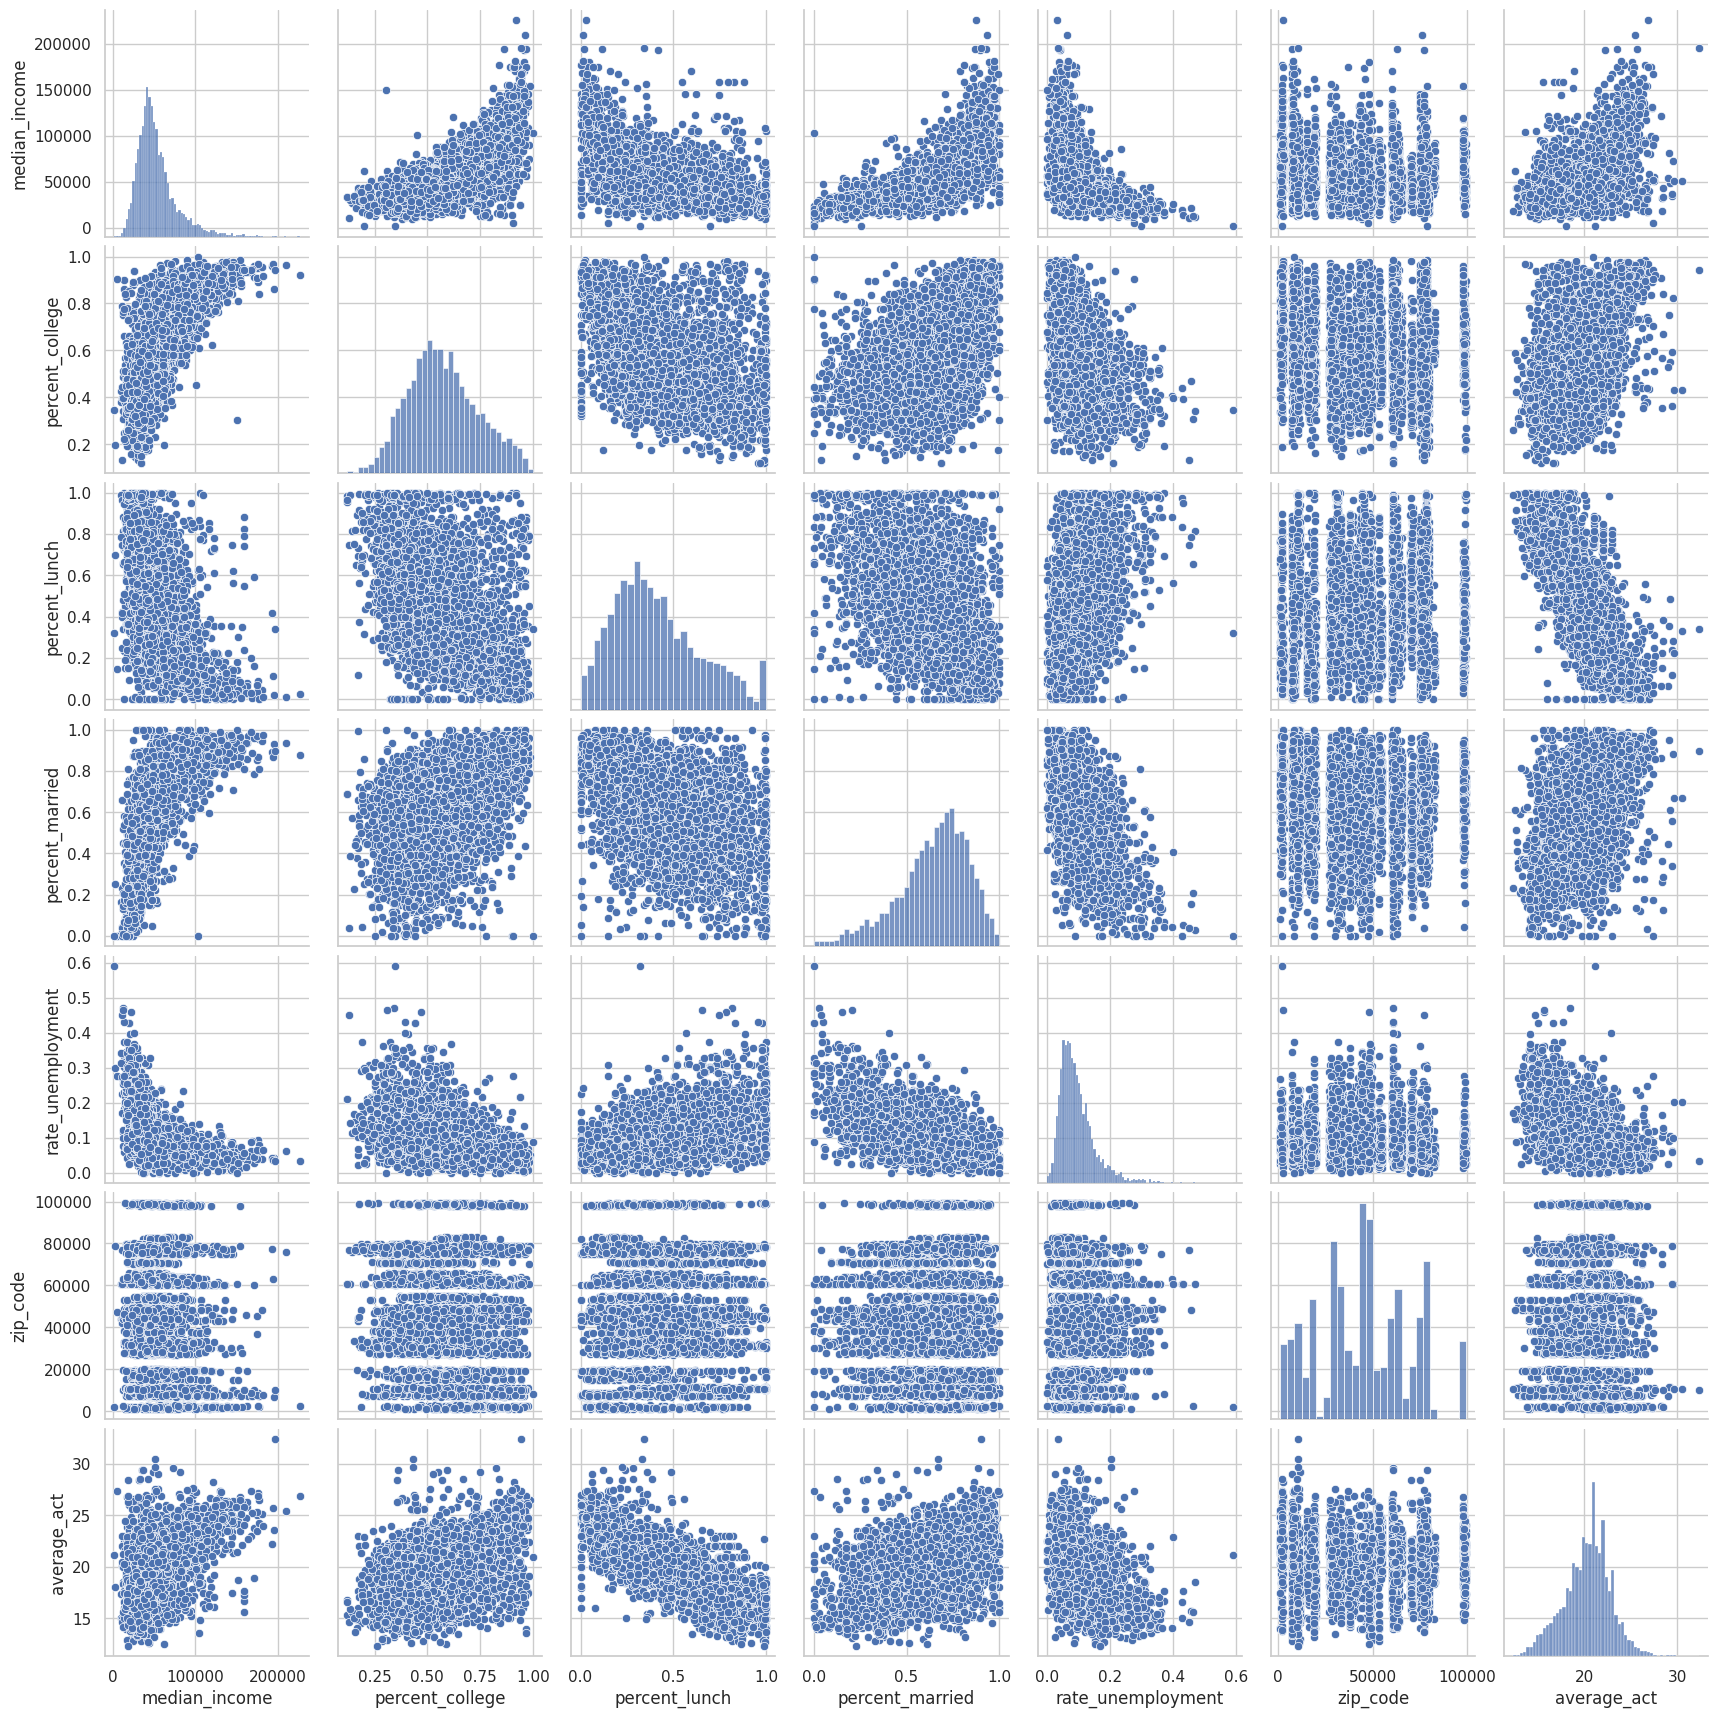

In [10]:
sns.pairplot(train.drop(columns = ['school_type', 'year']))

There looks to be relationships, at least individually, between socio-economic values and average act score.

Lets also make a heatmap to further explore correlations between variables.

<ipython-input-11-d81c63518a6e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.loc[:, ['average_act', 'median_income', 'percent_lunch', 'percent_college', 'rate_unemployment', 'percent_married', 'zip_code', 'state']].corr()


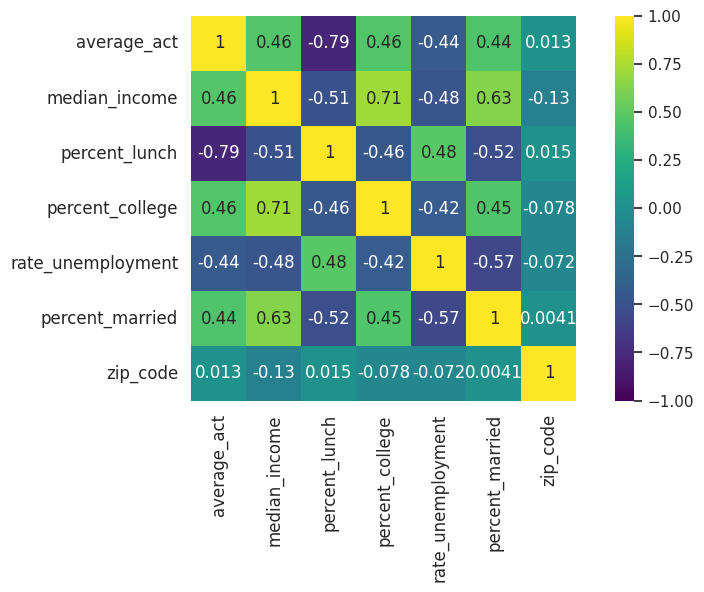

In [11]:
corr_matrix = train.loc[:, ['average_act', 'median_income', 'percent_lunch', 'percent_college', 'rate_unemployment', 'percent_married', 'zip_code', 'state']].corr() 

plt.figure(figsize=(10,5))

sns.heatmap(corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap='viridis')

plt.tick_params(labelsize=12);

According to this heatmap of the correlations between variables, percent lunch seems to have a strong negative correlation to average ACT. The other variables, except for zip_code which has a very low amount, seem to have a moderate correlation.

## Analysis

## Regression with All Predictors

Create a multiple linear regression model with all of the socioeconomic variables to predict ACT score. 

In [12]:
model = smf.ols(formula='average_act ~ median_income + percent_lunch + percent_college + rate_unemployment + percent_married', data=train).fit()

In [13]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     1985.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        19:22:58   Log-Likelihood:                -10654.
No. Observations:                5781   AIC:                         2.132e+04
Df Residuals:                    5775   BIC:                         2.136e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.7774      0.15

The R squared is pretty big, which means it did a pretty good job at fitting the data

Median income and percent married have high P values and low coefficients, indicating that in this model with all of the variables they are not super significant to the model. 

We can also see from the coefficents that percent lunch is the most influential in this model as the absolute value of it is very high in comparison to the other predictor variables. 

Overall this model is pretty good, but lets see if there is a better one.

Lets go through each variable separately to see how they preform on their own, firstly making a residual plot to access the model.

## Individual Predictor Regression Models

What is the optimal model for predicting ACT scores? Is it all variables or a certain combination? To find the best combination of variables, lets first analyze each individual socioeconomic variable as a sole predictor in a model to see what is happening with each. 

###Median Income

Lets make a residual plot of median income and average act.

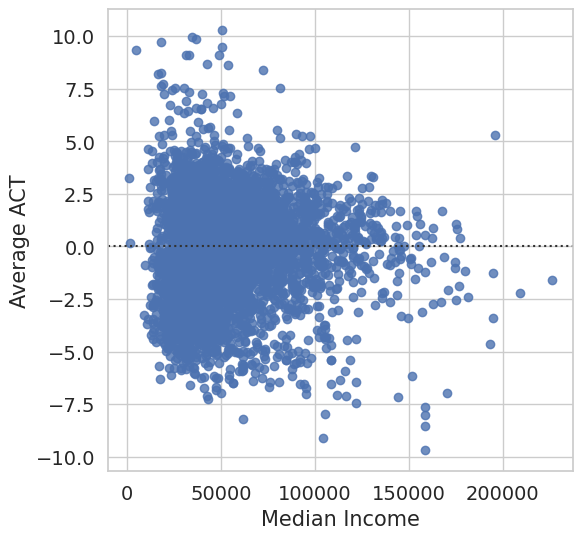

In [14]:
plt.figure(figsize=(6,6))

# residual plot
sns.residplot(data=train, x = 'median_income', y = 'average_act')

# Add axis labels
plt.xlabel('Median Income', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

Sometimes, it might be useful to do a log transformation of skewed distributions. Even though lots of data points are on the lower end of the axis,
we still see a unidentifiable pattern/clump around the 0, meaning our model has captured variations in the data well enough to not need transformations. 

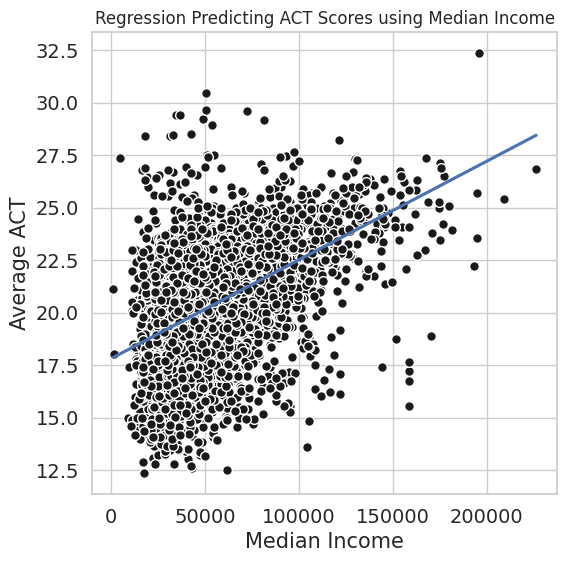

In [15]:
plt.figure(figsize=(6,6))

plt.plot(train['median_income'], train['average_act'], 'ko', mec ='w', ms=7)

# plot regression line
sns.regplot(data=train, x = 'median_income', y = 'average_act', order=1, scatter=False, ci=None)

# change axis and title
plt.title('Regression Predicting ACT Scores using Median Income')
plt.xlabel('Median Income', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)

plt.tick_params(labelsize=14);

There seems to be a general positive relationship between median income and average ACT.

Lets make the regression model

In [16]:
model_med_income = smf.ols(formula='average_act ~ median_income', data=train).fit()

In [17]:
print(model_med_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     1581.
Date:                Sat, 06 May 2023   Prob (F-statistic):          6.93e-306
Time:                        19:23:00   Log-Likelihood:                -12846.
No. Observations:                5781   AIC:                         2.570e+04
Df Residuals:                    5779   BIC:                         2.571e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8147      0.069    256.723

Median income seems to be significant in this model. The R squared value is not relatively large, so we can't strongly say this model is a good fit for the data. 

###Percent Lunch

Lets make the residual plot

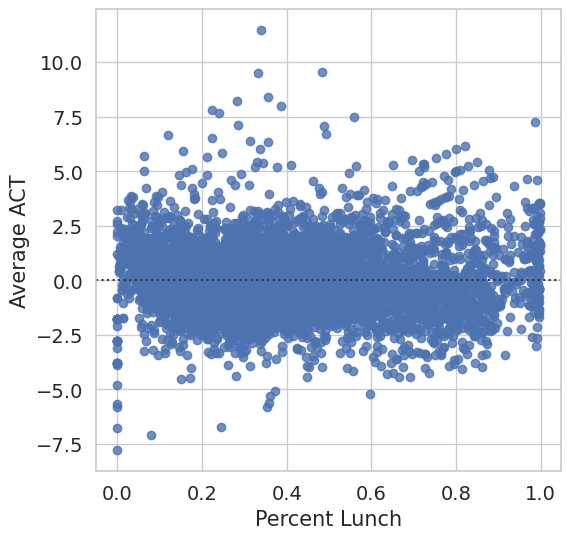

In [18]:
plt.figure(figsize=(6,6))

# residual plot
sns.residplot(data=train, x = 'percent_lunch', y = 'average_act')

# Add axis labels
plt.xlabel('Percent Lunch', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

Sometimes, it might be useful to do a log transformation of skewed distributions. We see a unidentifiable pattern/clump around the 0, meaning our model has captured variations in the data well enough to not need transformations. 

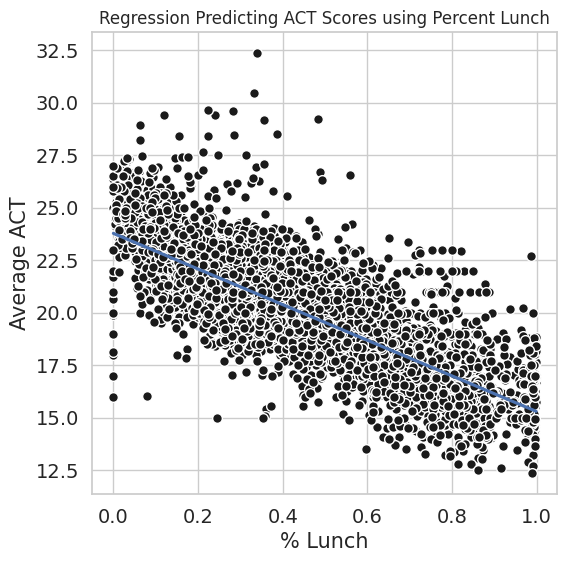

In [19]:
plt.figure(figsize=(6,6))

# train the model
plt.plot(train['percent_lunch'], train['average_act'], 'ko', mec ='w', ms=7)

# plot regression line
sns.regplot(data=train, x = 'percent_lunch', y = 'average_act', order=1, scatter=False, ci=None)

# change axis and title
plt.title('Regression Predicting ACT Scores using Percent Lunch')
plt.xlabel('% Lunch', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)

plt.tick_params(labelsize=14);

There seems to be a negative relationship between percent lunch and average ACT.

In [20]:
model_percent_lunch = smf.ols(formula='average_act ~ percent_lunch', data=train).fit()

In [21]:
print(model_percent_lunch.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     9407.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        19:23:01   Log-Likelihood:                -10753.
No. Observations:                5781   AIC:                         2.151e+04
Df Residuals:                    5779   BIC:                         2.152e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.7861      0.041    577.051

The R squared is relatively high, and the P values are low. Percent lunch is a comprable predictor model for the data. The R squared is pretty similar to the R squared for the full model, so do the other variable's probaby don't have much significance.

### Percent College

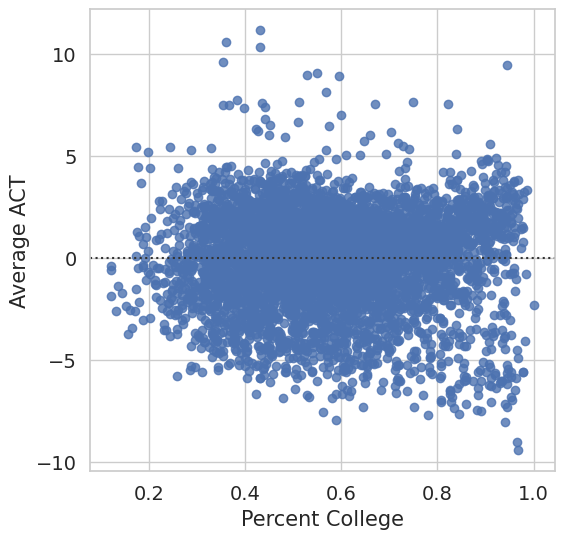

In [22]:
plt.figure(figsize=(6,6))

# residual plot
sns.residplot(data=train, x = 'percent_college', y = 'average_act')

# Add axis labels
plt.xlabel('Percent College', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

Sometimes, it might be useful to do a log transformation of skewed distributions. We see a unidentifiable pattern/clump around the 0, meaning our model has captured variations in the data well enough to not need transformations. 

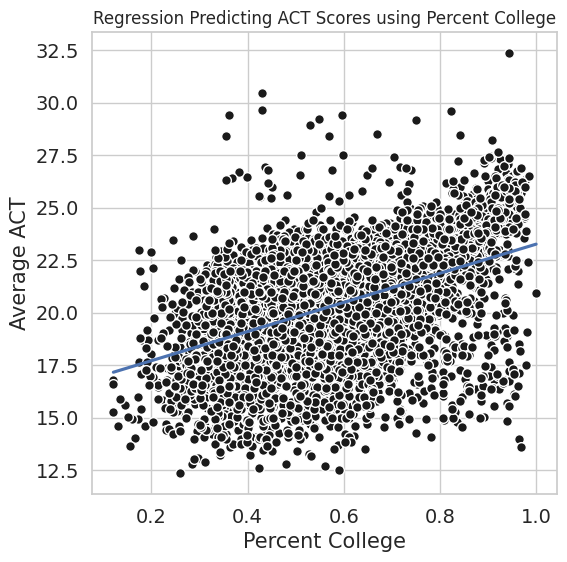

In [23]:
plt.figure(figsize=(6,6))

# train model
plt.plot(train['percent_college'], train['average_act'], 'ko', mec ='w', ms=7)

# plot regression line
sns.regplot(data=train, x = 'percent_college', y = 'average_act', order=1, scatter=False, ci=None)

# change axis and title
plt.title('Regression Predicting ACT Scores using Percent College')
plt.xlabel('Percent College', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)

plt.tick_params(labelsize=14);

There seems to be a slight positive relationship between percent college and average ACT.

In [24]:
model_percent_college = smf.ols(formula='average_act ~ percent_college', data=train).fit()

In [25]:
print(model_percent_college.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     1520.
Date:                Sat, 06 May 2023   Prob (F-statistic):          1.99e-295
Time:                        19:23:03   Log-Likelihood:                -12870.
No. Observations:                5781   AIC:                         2.574e+04
Df Residuals:                    5779   BIC:                         2.576e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.3351      0.106    1

Percent college doesn't seem to be significant in this model. The R squared value is not relatively large, so we can't strongly say this model is a good fit for the data. 

### Rate Unemployment

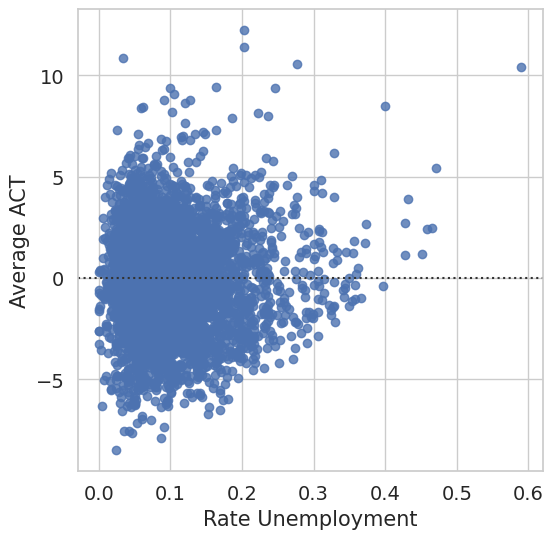

In [26]:
plt.figure(figsize=(6,6))

# residual plot
sns.residplot(data=train, x = 'rate_unemployment', y = 'average_act')

# Add axis labels
plt.xlabel('Rate Unemployment', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

Sometimes, it might be useful to do a log transformation of skewed distributions. Even though lots of data points are on the lower end of the axis,
we still see a unidentifiable pattern/clump around the 0, meaning our model has captured variations in the data well enough to not need transformations. 

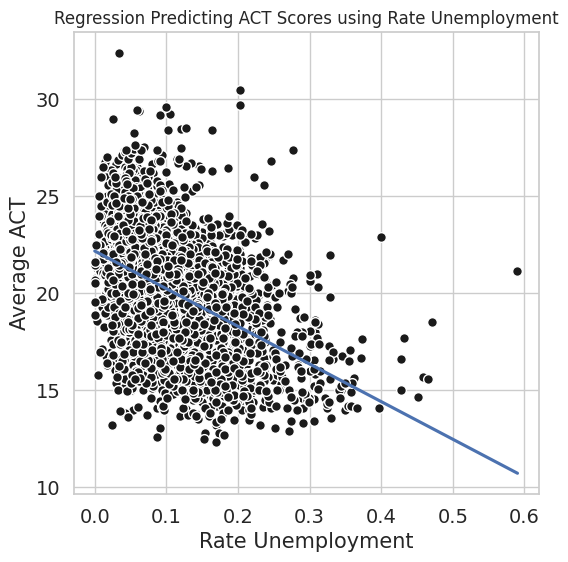

In [27]:
plt.figure(figsize=(6,6))

plt.plot(train['rate_unemployment'], train['average_act'], 'ko', mec ='w', ms=7)

# plot regression line
sns.regplot(data=train, x = 'rate_unemployment', y = 'average_act', order=1, scatter=False, ci=None)

# change axis and title
plt.title('Regression Predicting ACT Scores using Rate Unemployment')
plt.xlabel('Rate Unemployment', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)

plt.tick_params(labelsize=14);

There seems to be a generally negative relationship between rate unemployment and average ACT.

In [28]:
model_unemployment = smf.ols(formula='average_act ~ rate_unemployment', data=train).fit()

In [29]:
print(model_unemployment.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     1363.
Date:                Sat, 06 May 2023   Prob (F-statistic):          4.30e-268
Time:                        19:23:04   Log-Likelihood:                -12933.
No. Observations:                5781   AIC:                         2.587e+04
Df Residuals:                    5779   BIC:                         2.588e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.1765      0.05

Rate of unemployment  doesn't seem to be significant in this model. The R squared value is pretty small, so we can't strongly say this model is a good fit for the data.

### Percent Married

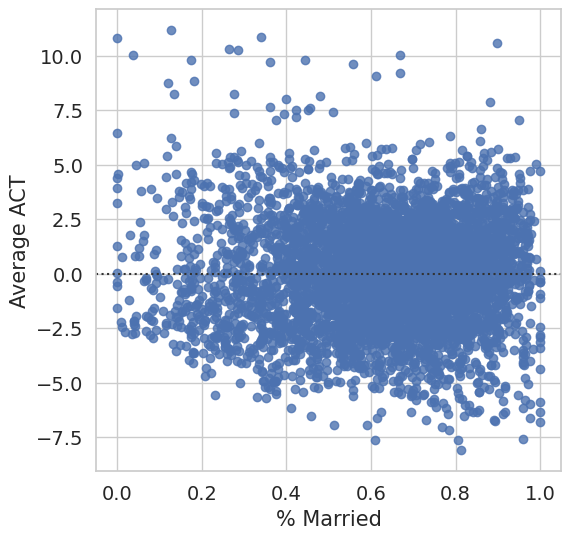

In [30]:
plt.figure(figsize=(6,6))

# residual plot
sns.residplot(data=train, x = 'percent_married', y = 'average_act')

# Add axis labels
plt.xlabel('% Married', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

Sometimes, it might be useful to do a log transformation of skewed distributions. We see a unidentifiable pattern/clump around the 0, meaning our model has captured variations in the data well enough to not need transformations. 

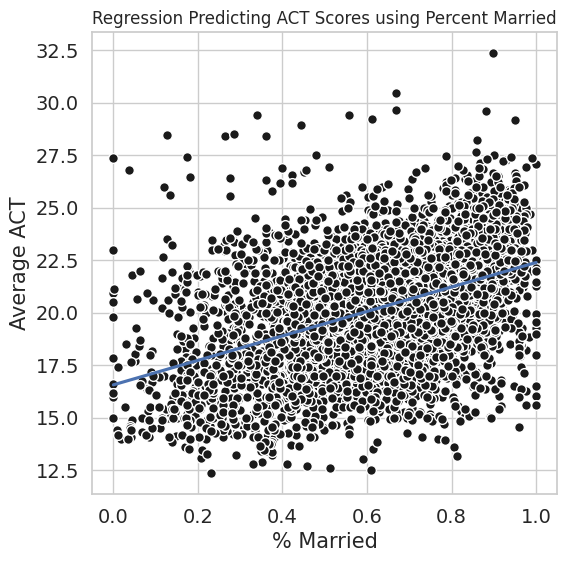

In [31]:
plt.figure(figsize=(6,6))

# train model
plt.plot(train['percent_married'], train['average_act'], 'ko', mec ='w', ms=7)

# plot regression line
sns.regplot(data=train, x = 'percent_married', y = 'average_act', order=1, scatter=False, ci=None)

# change axis and title
plt.title('Regression Predicting ACT Scores using Percent Married')
plt.xlabel('% Married', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)

plt.tick_params(labelsize=14);

There seems to be a  positive relationship between percent married and average ACT.

In [32]:
model_married = smf.ols(formula='average_act ~ percent_married', data=train).fit()

In [33]:
print(model_married.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     1402.
Date:                Sat, 06 May 2023   Prob (F-statistic):          7.60e-275
Time:                        19:23:05   Log-Likelihood:                -12918.
No. Observations:                5781   AIC:                         2.584e+04
Df Residuals:                    5779   BIC:                         2.585e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.5734      0.104    1

Percent married doesn't seem to be significant in this model. The R squared value is not large, so we can't strongly say this model is a good fit for the data.

Overall, it looks like percent lunch is the most influential on its own in a regression model. 

## Best Subset Model


To find the optimal amount and combination of predictor variables to create the best model, we can write a function to test them all. First, store the trianing data we need for the predictors and for the results in X and Y, respectively. Then we can write a function that loops through all the possible combinations at each number of predictors, saving the best one based on adjusted R squared. 

In [34]:
# data to pass into best subset selection function
X = train[train.columns.difference(['school_level', 'school_type','state', 'zip_code','average_act','year'])] #X train
Y = train['average_act'] #Y train

In [35]:
from os import name 
from itertools import combinations
import statsmodels.api as sm


# function returns lists of best aic, bic, adjusted r squared values for models of each possible number of predictors
# input: X is a dataframe of the predictor variables and their values for each school (percent married, etc.)
#        y is a dataframe of the target value and their values for each school (act)

def best_subset_selection(X, y):

    variable_names = X.columns.values # holds names of predictors

    number_variables = len(variable_names) # holds number of possible predictor variables

    # create empty arrays to hold aic, bic, and adjusted r squared for the best model
    best_aic = np.zeros(number_variables)
    best_bic = np.zeros(number_variables)
    best_adjusted_rsquared = np.zeros(number_variables)

    # create empty list for storing best combo of predictors at each size
    best_predictors = list()

    # iterate over possible numbers of predictors
    for k in range(number_variables):

        # Get the names of all combinations of k+1 predictors
        subset_names = list(combinations(variable_names, k+1))

        # Loop over all models with k+1 predictors
        for n, predictor_names in enumerate(subset_names):

            # Fit the model
            predictors_subset = X.loc[:, predictor_names]

            model = sm.OLS(y, sm.add_constant(predictors_subset)).fit() 

            # Initialize the best values with the first model
            if n == 0:

                best_rsquared_k = model.rsquared
                best_aic_k = model.aic
                best_bic_k = model.bic
                best_adjusted_rsquared_k = model.rsquared_adj
                best_predictors_k = predictor_names

            # If a model has a better r-squared, update the best values
            elif model.rsquared > best_rsquared_k:

                best_rsquared_k = model.rsquared
                best_aic_k = model.aic
                best_bic_k = model.bic
                best_adjusted_rsquared_k = model.rsquared_adj
                best_predictors_k = predictor_names

        # Record the values for the best model at this number of predictors
        best_bic[k] = best_bic_k
        best_aic[k] = best_aic_k
        best_adjusted_rsquared[k] = best_adjusted_rsquared_k
        best_predictors.append(best_predictors_k)

    return best_aic, best_bic, best_adjusted_rsquared, best_predictors

Lets write a function to plot the best AIC, BIC, and adjusted R-squared values at each number of possible predictors. We will also take into account penalties for a higher number of variables when we choose our best model.

In [36]:
def plot_best_subset_results(best_aic, best_bic, best_adjusted_rsquared, best_predictors):
    """ Plot the best AIC, BIC, and adjusted R-squared values at each number of possible predictors

    Input
    -----
    best_aic : AIC for the best model at each number of possible predictors

    best_bic : BIC for the best model at each number of possible predictors

    best_adjusted_rsquared : adjusted R-squared for the best model at each number of possible predictors

    best_predictors : predictor names for the best model at each number of possible predictors

    """

    number_predictors = np.arange(len(best_aic))+1

    plt.subplots(1,3, figsize=(15,4))
    plt.subplot(1,3,1)
    plt.plot(number_predictors, best_aic, 'b-o')
    plt.plot(number_predictors[np.argmin(best_aic)], np.min(best_aic), 'ro')
    plt.xticks(number_predictors)
    plt.xlabel('Number of predictors', fontsize=18)
    plt.ylabel('AIC', fontsize=18)
    plt.title(best_predictors[np.argmin(best_aic)])

    plt.subplot(1,3,2)
    plt.plot(number_predictors, best_bic, 'b-o')
    plt.plot(number_predictors[np.argmin(best_bic)], np.min(best_bic), 'ro')
    plt.xticks(number_predictors)
    plt.xlabel('Number of predictors', fontsize=18)
    plt.ylabel('BIC', fontsize=18)
    plt.title(best_predictors[np.argmin(best_bic)])

    plt.subplot(1,3,3)
    plt.plot(number_predictors, best_adjusted_rsquared, 'b-o');
    plt.plot(number_predictors[np.argmax(best_adjusted_rsquared)], np.max(best_adjusted_rsquared), 'ro')
    plt.xticks(number_predictors)
    plt.xlabel('Number of predictors', fontsize=18)
    plt.ylabel('Adjusted R-squared', fontsize=18)
    plt.title(best_predictors[np.argmax(best_adjusted_rsquared)])

    plt.subplots_adjust(wspace = 0.3)

Lets put our test data through the function to get the best subset of predictor variables for each number of predictors.

In [37]:
best_aic, best_bic, best_adjusted_rsquared, best_predictors = best_subset_selection(X, Y)

Lets use the function 'plot_best_subset_results' to graph the best results according to each variable we are using to measure accuracy of the model.

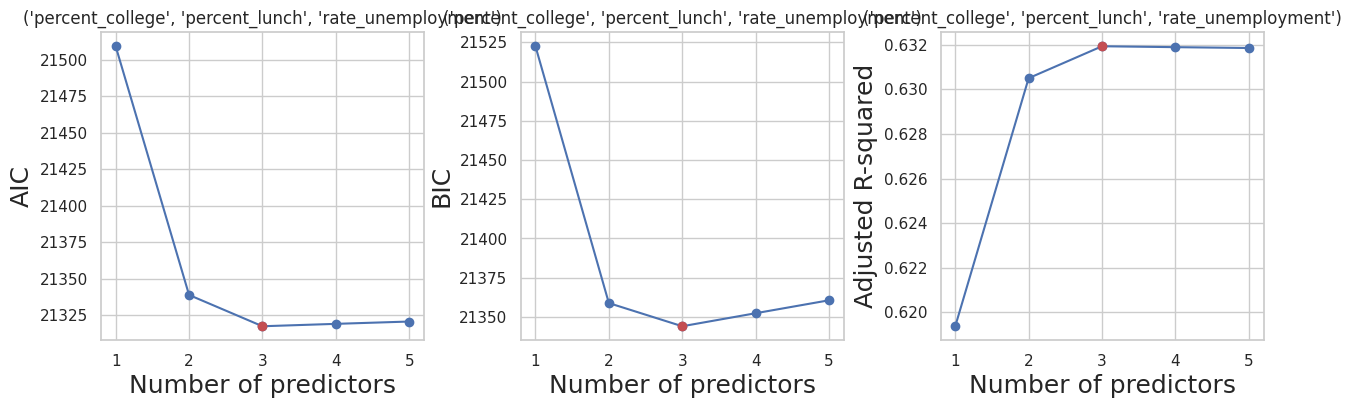

In [38]:
plot_best_subset_results(best_aic, best_bic, best_adjusted_rsquared, best_predictors)

Based on the graphs above, 3 predictors has the best values for each accuracy indicator. 

Lets print the best subset of predictors for each possible number of predictors according to our function. 

In [39]:
best_predictors

[('percent_lunch',),
 ('percent_college', 'percent_lunch'),
 ('percent_college', 'percent_lunch', 'rate_unemployment'),
 ('median_income', 'percent_college', 'percent_lunch', 'rate_unemployment'),
 ('median_income',
  'percent_college',
  'percent_lunch',
  'percent_married',
  'rate_unemployment')]

**3 predictors is the optimal amount, and the best combination according to our function is percent_college, percent_lunch, and rate_unemployment.**

Lets make this model and access it.

In [40]:
model_optimal = smf.ols(formula='average_act ~ percent_college + percent_lunch + rate_unemployment', data=train).fit()

In [41]:
print(model_optimal.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     3309.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        19:23:06   Log-Likelihood:                -10655.
No. Observations:                5781   AIC:                         2.132e+04
Df Residuals:                    5777   BIC:                         2.134e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.7261      0.11

The R-squared value ranges from 0 to 1, where 0 indicates that the model doesn't explain any variability in the predictor variable, and 1 indicates that the model explains all the variability in the predictor variable.

For BIC and AIC, they are more measures of accuracy for the model, but take off points for higher complexities (more variables). We want this number to be as small as possible.

This model is pretty good. It has a higher R squared value than any of the individual variable models and the regression model with all of the predictors. P values are low, and the AIC and BIC are also the lower than the other models. All of this points to this being the best model so far, and probably a pretty good one. 

In addition, however, notice that the percent lunch coeffient is the most influential factor in predicting act score as it's absolute value is the greatest value. 

This is also shown as the difference in adjusted R squared is very small compared to the percent lunch individual model. The absolute value of the coefficient of percent lunch is also very high in comparison to the others, indicating that increases in the percent lunch value have a larger impact on the predicted value. 


### Access the model against the Test Data

Lets feed new data to our model(the test data), and compare its preditions to the actual average ACT.

In [42]:
test.head(2)

,median_income,percent_college,percent_lunch,percent_married,rate_unemployment,school_level,school_type,state,year,zip_code,average_act
0,52833.0,0.564717,0.226481,0.823245,0.100518,High,Regular School,MI,2016-2017,49112,21.000000
1,62411.0,0.537197,0.677895,0.313253,0.095582,High,Regular School,NY,2016-2017,11413,16.245421


In [43]:
y_predict = model_optimal.predict(test)

In [44]:
y_predict.head() # not a true data frame

0    21.699677
1    18.183415
2    19.480069
3    18.153498
4    20.766456
dtype: float64

Lets graph these predictions against the actual data. We first need to convert our y_prediction object to a dataframe, and combine our prediction values and actual values into one.  

In [45]:
# Convert predicted values to a data frame
predicted_df_optimal = pd.DataFrame({'predicted_act': y_predict})

In [46]:
# Concatenate predicted values with test data
optimal_result = pd.concat([test, predicted_df_optimal], axis=1)

In [47]:
optimal_result.head(2)

,median_income,percent_college,percent_lunch,percent_married,rate_unemployment,school_level,school_type,state,year,zip_code,average_act,predicted_act
0,52833.0,0.564717,0.226481,0.823245,0.100518,High,Regular School,MI,2016-2017,49112,21.000000,21.699677
1,62411.0,0.537197,0.677895,0.313253,0.095582,High,Regular School,NY,2016-2017,11413,16.245421,18.183415


Lets graph the predicted variables and the actual values to see how our model preformed.

<ipython-input-48-67aceb507444>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=optimal_result, x = 'average_act', y = 'predicted_act', palette='bright') # recorded act scores


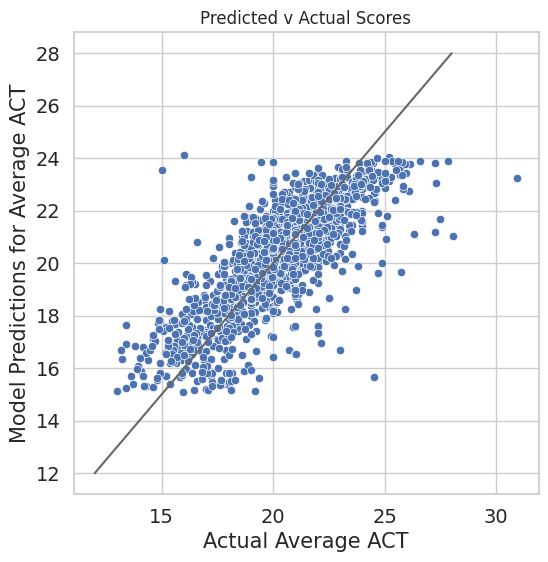

In [48]:
from pandas.compat import platform
plt.figure(figsize=(6,6))

# Add the scatter plots
sns.scatterplot(data=optimal_result, x = 'average_act', y = 'predicted_act', palette='bright') # recorded act scores

# Add an Identity Line
plt.plot([12, 28], [12, 28], c=".4")

# Customize the title
plt.title('Predicted v Actual Scores')

# Add axis labels
plt.xlabel('Actual Average ACT', fontsize=15)
plt.ylabel('Model Predictions for Average ACT', fontsize=15)


# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

By graphing the actual ACT and the model's predictions, we can begin to discover how accurate our model is in predicting. The gray line is an identity line, if the predictions and actuals were perfectly identical (meaning our model perfectly predicted each time) all of our points would fall on that line. We see that the points generally fall in the area of the line and trend in the same direction. Lets look at more specific indicators of accuracy.

**Measure of accuracy in terms of ACT points**

**Root Mean Squared Error**

The RMSE (root mean squared error) is a measure of the average distance between the predicted and actual values in the same units as the data. In the case of regression, the RMSE measures the standard deviation of the errors made by the regression model, and lower values indicate better performance.

In [49]:
rmse = np.sqrt(mean_squared_error(optimal_result['average_act'], optimal_result['predicted_act']))

print("RMSE of best subset model:", rmse)

RMSE of best subset model: 1.5376371303566485


Our model's predictions are usually off by about 1.5 ACT points according to RMSE

**Mean Absolute Error** 

Measures the average absolute difference between the predicted and actual values, that is, the average distance between the predicted and actual values without squaring the errors.

In [50]:
mae = np.sqrt(mean_absolute_error(optimal_result['average_act'], optimal_result['predicted_act']))

print("Mean Absolute Error of best subset model:", mae)

Mean Absolute Error of best subset model: 1.0805568671225891


Our model's predictions are usually only off by about 1.08 points according to MAE

Both the mean absolute error and root mean squared error are relatively low, **our best subset model is usually only off by about 1 point**. This model demonstrates a strong relationship between the percent of students on free/reduced lunch, percent of adults with a college degree, and rate of unemployment in the area to predict average ACT scores.

## Additional Question: Does One's State Affect Score?

In addition to socioeconomic factors, would the state a student resides in affect their score? We chose to focus in on states from both the Pacific Northwest and the Midwest. 

These regions are similar in terms of politics, average income, and education with one difference being that [Illinois](https://college.us.com/is-the-act-required-to-graduate-high-school/#:~:text=In%20some%20states%2C%20the%20ACT,ACT%20as%20a%20graduation%20requirement.) requires the SAT/ACT to graduate high school and [Washington](https://www.washingtonea.org/advocacy/testing/state-testing-graduation/) does not. We are curious to see how scores differ between these states in different regions and see if the regression model improves if we add in the state predictor.

To summarize our additional question: **Does including the state in our predictive model improve the model? and is there a meaningful difference in affect of socioeconomic factors on ACT/SAT scores between states in the PNW and Midwest regions?**

To answer the question, we will use our training data with the state and region data included to make a model. Since the predictor is categorical, we have a dummy variable, region, that we can use for the model. 

In [51]:
df_state.head()

,median_income,percent_college,percent_lunch,percent_married,rate_unemployment,school_level,school_type,state,year,zip_code,average_act,region
0,66492.0,0.599102,0.230769,0.881449,0.109262,High,Regular School,IL,2016-2017,61024,19.900000,illinois
1,76037.0,0.611076,0.460407,0.768087,0.104948,High,Regular School,IL,2016-2017,60099,18.400000,illinois
2,68371.0,0.832136,0.255148,0.525547,0.091684,High,Regular School,WA,2016-2017,98125,23.498168,washington
3,61250.0,0.621197,0.242017,0.661754,0.159808,High,Regular School,WA,2016-2017,98373,21.568987,washington
4,38182.0,0.620830,0.363921,0.615611,0.134357,High,Regular School,WA,2016-2017,98532,22.594628,washington


First, lets look at the linear regression plot for ACT score using percent of students on free and reduced lunch, separating by state. 

<Figure size 600x600 with 0 Axes>

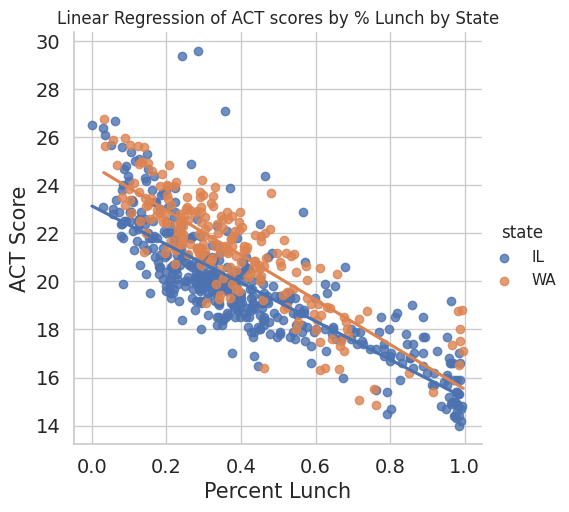

In [52]:
plt.figure(figsize=(6,6))

# Add the regression lines
sns.lmplot(data=df_state, x = 'percent_lunch', y = 'average_act', hue = 'state', ci=None)

# Change Title
plt.title('Linear Regression of ACT scores by % Lunch by State')

# Add axis labels
plt.xlabel('Percent Lunch', fontsize=15)
plt.ylabel('ACT Score', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

It looks like the Illinois model predicts overall lower scores than Washington. The general slopes, however, look pretty similar as the lines are loosely parallel. 

Lets make the regression model using percent lunch and the state. We will add the variable to the equation, this allows variables to just change the intercept. We will also just use percent lunch as the numerical predictor variable as it is the dominating predictor from our best subset (see best subset selection for more details).

In [53]:
model_state = smf.ols(formula='average_act ~ percent_lunch + C(state)', data=df_state).fit()

In [54]:
print(model_state.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     807.3
Date:                Sat, 06 May 2023   Prob (F-statistic):          1.65e-178
Time:                        19:23:08   Log-Likelihood:                -1161.0
No. Observations:                 667   AIC:                             2328.
Df Residuals:                     664   BIC:                             2341.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         23.2721      0.114    204.

The R squared value is 0.709, a relatively high value and ~0.1 higher than our best subset model. P values are low enough to be significant, but AIC and BIC values are higher by ~200. The coefficients of each predictor show that the percent lunch variable is still most influential. This model seems to be around the same or slightly better than our best subset. 

Lets compare it to if we multiply the state predictor variable and thus change the slope instead.

In [55]:
model_state_2 = smf.ols(formula='average_act ~ percent_lunch * C(state)', data=df_state).fit()

In [56]:
print(model_state_2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     544.8
Date:                Sat, 06 May 2023   Prob (F-statistic):          2.13e-178
Time:                        19:23:08   Log-Likelihood:                -1157.7
No. Observations:                 667   AIC:                             2323.
Df Residuals:                     663   BIC:                             2341.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

The R squared value is 0.711, a relatively high value that is very slightly higher than our first state model and ~0.1 higher than our best subset model. P values are low enough to be significant, but AIC and BIC values are higher by ~200. The BIC is slightly lower in this model, which is optimal, but by a very marginal amount. The coefficients of each predictor show that the percent lunch variable is still most influential. This model seems to be around the same as our best subset, and slightly better than our first state model.

We can choose the strongest model of the two, based on the R squared value and P values. It seems like both models are pretty similar, but because the second state model experienced no deductions in indicators of a good model and slight improvements in R squared and AIC, we will use that as our state regression model to answer our question. 

### Access the State Included Model

y_prediction holds predictions for act scores based on school data using the model. Data the model has not seen (from a separate test data frame) was fed, and the predictions for average ACT scores are stored as predicted ACT scores. The data frame inputted is the test data frame with the relevent region dummy variables. 

We can compare this to the actual average ACT values to access the model.

In [57]:
df_state_test.head(2) # added region dummy variable

,median_income,percent_college,percent_lunch,percent_married,rate_unemployment,school_level,school_type,state,year,zip_code,average_act,region
0,79655.0,0.593403,0.555556,0.770013,0.055068,High,Regular School,WA,2016-2017,98108,18.516484,washington
1,113883.0,0.874624,0.153449,0.906178,0.096857,High,Regular School,IL,2016-2017,60031,22.500000,illinois


In [58]:
y_prediction = model_state_2.predict(df_state_test)

In [59]:
y_prediction.head()

0    19.653943
1    21.916591
2    21.340196
3    21.880857
4    22.465053
dtype: float64

Lets graph these predictions against the actual data. We first need to convert our y_prediction object to a dataframe, and combine our prediction values and actual values into one.  

In [60]:
# Convert predicted values to a data frame
predicted_df = pd.DataFrame({'predicted_act': y_prediction})

In [61]:
# Concatenate predicted values with new_data
state_result = pd.concat([df_state_test, predicted_df], axis=1)

In [62]:
state_result.head(2)

,median_income,percent_college,percent_lunch,percent_married,rate_unemployment,school_level,school_type,state,year,zip_code,average_act,region,predicted_act
0,79655.0,0.593403,0.555556,0.770013,0.055068,High,Regular School,WA,2016-2017,98108,18.516484,washington,19.653943
1,113883.0,0.874624,0.153449,0.906178,0.096857,High,Regular School,IL,2016-2017,60031,22.500000,illinois,21.916591


Lets graph the predicted variables and the actual values to see how our model preforms.

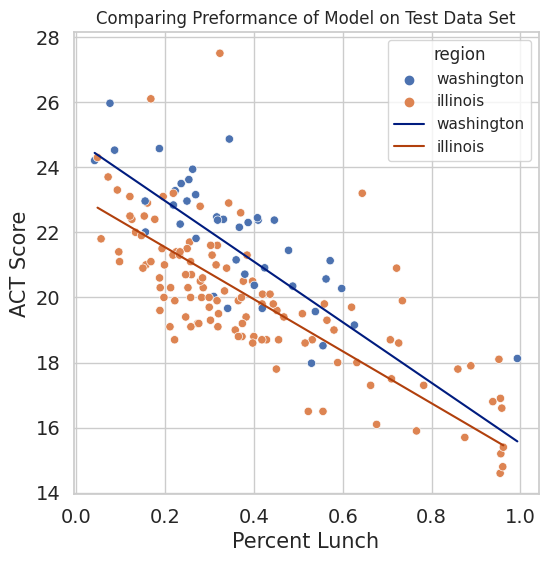

In [63]:
from pandas.compat import platform
plt.figure(figsize=(6,6))

# Add the scatter plots
sns.scatterplot(data=state_result, x = 'percent_lunch', y = 'average_act', hue='region', palette='deep') # recorded act scores
sns.lineplot(data=state_result, x = 'percent_lunch', y = 'predicted_act', hue='region', palette='dark') # predicted act scores by model

# Customize the title
plt.title('Comparing Preformance of Model on Test Data Set')

# Add axis labels
plt.xlabel('Percent Lunch', fontsize=15)
plt.ylabel('ACT Score', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

Lets also look at the predicted versus actual scores, graphed against each other.

<ipython-input-64-ad634db86a29>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=state_result, x = 'average_act', y = 'predicted_act', palette='bright') # recorded act scores


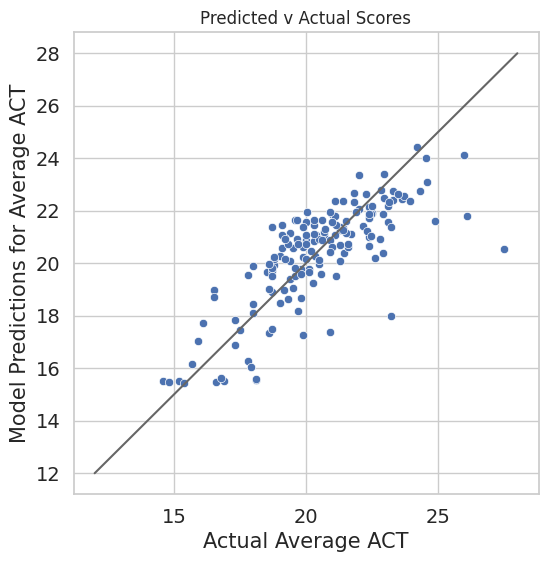

In [64]:
from pandas.compat import platform
plt.figure(figsize=(6,6))

# Add the scatter plots
sns.scatterplot(data=state_result, x = 'average_act', y = 'predicted_act', palette='bright') # recorded act scores

# Add an Identity Line
plt.plot([12, 28], [12, 28], c=".4")

# Customize the title
plt.title('Predicted v Actual Scores')

# Add axis labels
plt.xlabel('Actual Average ACT', fontsize=15)
plt.ylabel('Model Predictions for Average ACT', fontsize=15)


# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

By graphing the actual ACT and the model's predictions, we can begin to discover how accurate our model is in predicting. The gray line is an identity line, if the predictions and actuals were perfectly identical (meaning our model perfectly predicted each time) all of our points would fall on that line. **We see that the points generally fall in the area of the line and trend in the same direction, though there are variations and overall less points as we have only 2 states data.**

**Measure of accuracy in terms of ACT points**

**Root Mean Squared Error**

The RMSE (root mean squared error) is a measure of the average distance between the predicted and actual values in the same units as the data. In the case of regression, the RMSE measures the standard deviation of the errors made by the regression model, and lower values indicate better performance.

In [65]:
rmse = np.sqrt(mean_squared_error(state_result['average_act'], state_result['predicted_act']))

print("RMSE of state model:", rmse)

RMSE of state model: 1.4195081440123265


Our model's predictions are usually off by about 1.4 ACT points

**Mean Absolute Error** 

Measures the average absolute difference between the predicted and actual values, that is, the average distance between the predicted and actual values without squaring the errors.

In [66]:
mae = np.sqrt(mean_absolute_error(state_result['average_act'], state_result['predicted_act']))

print("Mean Absolute Error of state model:", mae)

Mean Absolute Error of state model: 1.0296348287118007


Our model's predictions are usually only off by about 1.02 points

Both the mean absolute error and root mean squared error are relatively low, **our model is usually only off by about 1 point.** If we compare this to our RSME and MAE of the best subset model, these have lower errors, but at such a low amount (0.1 and 0.06 less less for the state model) that it may not be significant. 

### In Conclusion, Additional Question

The predicted values seem to follow the trends of the actual data for both Illinois and Washington, so it looks like the model is pretty accurate. 

To answer the question, the model is around the same or just slightly improved by adding in the state as a predictor. The improvements in R squared and AIC are present, but slight. However, by using the state as a predictor, we can see the differences in scores when also including percent lunch as a predictor. Illinois has overall lower scores than washington at the same levels of students on free and reduced lunch, but as the percent increases, both states see a decrease in average ACT scores.  

## Conclusion

In conclusion, there is a strong relationship between average ACT/SAT scores and certain socioeconomic factors. Our optimal model uses the percent of students on free/reduced lunch, percent of adults with a college degree, and rate of unemployment in the area to predict average ACT scores. 

We found that **as the number of students on free/reduced lunch and rate of unemployment increase, and percent of adults with a college degree decrease; the average ACT/SAT scores decrease.** Support that our model is accurate is its high R squared value and significant coeffients for the variables. Using root mean squared error and mean adjusted error, our best subset model is usually only ~1 ACT point off in predictions. ACT scores can be reasonably predicted by certain socioeconomic factors.


Limitations in the study include missing some possible important predictors, like requirements of taking the SAT/ACT. In addition, not all states are included in the model, only 20 are included. We also do not know if the original data is biased in terms of what states are included or how much data from each state is present. We cannot be sure the original data was representitive of the US as a whole. 
Another limitation is that a lot of the socioeconomic variables are measured for the school's area, not for the people in/related to the school. For example, the median household income data comes from the school district, which includes households that do not send kids to the school. This indirect measurement could have an affect on regression, but the ideal situation of having data soley on the households enrolled in each school presents its own ethical and logistical barriers. 
